# Data Science Midterm Project

## รายชื่อสมาชิก

### 1. นายธนัช เบญจอนุอาชา		63199130111
### 2. นายภูริต อำนวยชัย		63199130117
## หัวข้อ Project: การพญากรการเกิดอุบัติเหตุบนถนนในแต่ละเส้นทาง และ พื้นที่
    
## จุดประสงค์
### * อุบัติเหตุตามท้องถนนที่เกิดจากรถยนต์บนเส้นทางต่างๆ เพิ่มขึ้นทุกๆปี เราจะสามารถลดปัญหาอุบัติเหตุนั้นลดลงได้อย่างไร? 
### * เพื่อให้ได้เป็นการตั้งรับหรือปรับปรุงเส้นทางให้ปลอดภัยและลดจำนวนอุบัติเหตุจากเส้นทางเหล่านั้นให้ลดลงและจะได้มีนโยบายจากทางภาครัฐลงไปแก้ปัญหาได้ตรงจุด

## เตรียมข้อมูล

In [65]:
import pandas as pd
import numpy as np

In [66]:
df_acci = pd.read_csv("./datasets/ubatiehtuthaangthnn.csv" , encoding='utf-8' , header=0 , names=['AcciYear','AcciDate','AcciTime','ReportDate','ReportTime','Acc_Code','Agencies','Route','Km','Province','Car1','AcciLocation','Assumed','CauseOfAcci','TotCar','TotDead','TotInjured','Weather','LATITUDE','LONGITUDE'])
# df_acci = pd.read_csv("./datasets/ubatiehtuthaangthnn.csv")

In [67]:
# from google.colab import drive
# drive.mount('/content/drive')

### Sample Data

In [68]:
df_acci.head()

,AcciYear,AcciDate,AcciTime,ReportDate,ReportTime,Acc_Code,Agencies,Route,Km,Province,Car1,AcciLocation,Assumed,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE
0,2019,01/01/2019,00:00,02/01/2019,06:11,201901023254,กรมทางหลวงชนบท,ทางหลวงชนบท ลบ.2029,4.00,ลพบุรี,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน/ที่ราบ,เมาสุรา,อื่น ๆ,1,0,2,แจ่มใส,14.959105,100.873463
1,2019,01/01/2019,00:03,13/02/2019,12:06,201902135341,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 24 ตอนควบคุม 0702,419.77,อุบลราชธานี,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง,ขับรถเร็วเกินกำหนด,ชนอุปกรณ์งานทาง,1,0,2,แจ่มใส,15.210738,104.862689
2,2019,01/01/2019,00:05,01/01/2019,09:52,201901012979,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 3168 ตอนควบคุม 0100,1.70,ประจวบคีรีขันธ์,รถจักรยานยนต์,ทางโค้งปกติ,ขับรถเร็วเกินกำหนด,ชนกัน/ชนยานพาหนะอื่นๆ,2,1,0,แจ่มใส,12.374259,99.907949
3,2019,01/01/2019,00:20,02/01/2019,05:12,201901023234,กรมทางหลวงชนบท,ทางหลวงชนบท ชม.4016,1.88,เชียงใหม่,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน/ที่ราบ,เมาสุรา,รถยนต์ชนรถไฟ,1,0,1,แจ่มใส,18.601721,98.804204
4,2019,01/01/2019,00:25,01/01/2019,09:54,201901012972,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 225 ตอนควบคุม 0202,68.80,นครสวรรค์,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง,คนหรือรถตัดหน้ากระชั้นชิด,พลิกคว่ำตกถนน,1,0,0,แจ่มใส,15.866389,100.590010


In [69]:
df_acci.tail()

,AcciYear,AcciDate,AcciTime,ReportDate,ReportTime,Acc_Code,Agencies,Route,Km,Province,Car1,AcciLocation,Assumed,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE
19960,2019,31/12/2019,23:30,01/01/2020,09:38,202001013732,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 3549 ตอนควบคุม 0100,1.25,กาญจนบุรี,รถปิคอัพบรรทุก 4 ล้อ,ทางโค้งปกติ,ขับรถเร็วเกินกำหนด,พลิกคว่ำตกถนน,1,1,0,แจ่มใส,15.171119,98.462388
19961,2019,31/12/2019,23:35,01/01/2020,00:14,202001013642,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 4034 ตอนควบคุม 0100,14.66,กระบี่,รถจักรยานยนต์,ทางแยกรูปตัว T,ไม่ให้สิทธิรถที่มาก่อนผ่านทาง เช่น ทางแยก,ชนกัน/ชนยานพาหนะอื่นๆ,2,0,2,แจ่มใส,8.092608,98.811692
19962,2019,31/12/2019,23:40,01/01/2020,00:58,202001013647,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 4 ตอนควบคุม 0802,601.12,ระนอง,รถจักรยานยนต์,ทางตรง,ขับรถเร็วเกินกำหนด,ชนอุปกรณ์งานทาง,1,2,0,หมอก/ควัน,9.939225,98.633500
19963,2019,31/12/2019,23:40,01/01/2020,06:44,202001013681,กรมทางหลวงชนบท,ทางหลวงชนบท ชม.3029,5.60,เชียงใหม่,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน/ที่ราบ,คนหรือรถตัดหน้ากระชั้นชิด,ชนท้าย,2,1,0,แจ่มใส,18.829234,99.006029
19964,2019,31/12/2019,23:45,01/01/2020,20:42,202001013882,กรมทางหลวง,ทางหลวงแผ่นดินหมายเลข 3268 ตอนควบคุม 0103,22.00,สมุทรปราการ,รถจักรยานยนต์,ทางตรง,ขับรถเร็วเกินกำหนด,ชนรถจอด,2,1,0,แจ่มใส,13.588040,100.788317


## ตั้งคำถามย่อยเพื่อสำรวจข้อมูล
 - ข้อมูลมี Error มากน้อยแค่ไหน
 - ถ้ามี Error จะจัดการกัมันยังไง Drop ทิ้งเลย หรือ ปรับปรุงข้อมูลดีกว่ากัน
 - ตรวจสอบข้อมูลในแต่ละ Column ว่าแบ่งออกเป็น กี่ Category(กี่ประเภท)

### Data Types

In [70]:
# df_acci.dtypes
df_acci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19965 entries, 0 to 19964
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AcciYear      19965 non-null  int64  
 1   AcciDate      19965 non-null  object 
 2   AcciTime      19965 non-null  object 
 3   ReportDate    19965 non-null  object 
 4   ReportTime    19965 non-null  object 
 5   Acc_Code      19965 non-null  int64  
 6   Agencies      19965 non-null  object 
 7   Route         19965 non-null  object 
 8   Km            19965 non-null  float64
 9   Province      19885 non-null  object 
 10  Car1          19938 non-null  object 
 11  AcciLocation  19965 non-null  object 
 12  Assumed       19965 non-null  object 
 13  CauseOfAcci   19965 non-null  object 
 14  TotCar        19965 non-null  int64  
 15  TotDead       19965 non-null  int64  
 16  TotInjured    19965 non-null  int64  
 17  Weather       19965 non-null  object 
 18  LATITUDE      19164 non-nu

### Data Columns (Features)

In [71]:
df_acci.columns

Index(['AcciYear', 'AcciDate', 'AcciTime', 'ReportDate', 'ReportTime',
       'Acc_Code', 'Agencies', 'Route', 'Km', 'Province', 'Car1',
       'AcciLocation', 'Assumed', 'CauseOfAcci', 'TotCar', 'TotDead',
       'TotInjured', 'Weather', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [72]:
df_acci.axes

[RangeIndex(start=0, stop=19965, step=1),
 Index(['AcciYear', 'AcciDate', 'AcciTime', 'ReportDate', 'ReportTime',
        'Acc_Code', 'Agencies', 'Route', 'Km', 'Province', 'Car1',
        'AcciLocation', 'Assumed', 'CauseOfAcci', 'TotCar', 'TotDead',
        'TotInjured', 'Weather', 'LATITUDE', 'LONGITUDE'],
       dtype='object')]

### Original sample sizes

In [73]:
df_acci.shape

(19965, 20)

### ตรวจสอบข้อมูลเบื้องต้น

In [74]:
df_acci.describe()

,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE
count,19965.0,1.996500e+04,19965.000000,19965.000000,19965.000000,19965.000000,19164.000000,19164.000000
mean,2019.0,1.842230e+11,124.940558,1.547508,0.163186,0.911145,14.311230,100.801904
std,0.0,5.418640e+10,209.273880,0.808013,0.490867,1.702509,3.091713,2.371218
min,2019.0,2.019042e+08,0.000000,0.000000,0.000000,0.000000,-0.001108,0.000000
25%,2019.0,2.019031e+11,10.500000,1.000000,0.000000,0.000000,13.457976,99.953297
50%,2019.0,2.019062e+11,40.000000,1.000000,0.000000,1.000000,14.479735,100.568929
75%,2019.0,2.019101e+11,134.900000,2.000000,0.000000,1.000000,16.491212,101.391040
max,2019.0,2.020062e+11,1310.100000,14.000000,13.000000,51.000000,41.549515,105.517239


### ตรวจสอบดูว่าเส้นทางสังกัดกรมทาง ไหนที่รับผิดชอบ และมีกี่กรมทาง

In [75]:
chkAgencies = df_acci.groupby(['Agencies'])
chkAgencies.first()

,AcciYear,AcciDate,AcciTime,ReportDate,ReportTime,Acc_Code,Route,Km,Province,Car1,AcciLocation,Assumed,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE
Agencies,,,,,,,,,,,,,,,,,,,
กรมทางหลวง,2019,01/01/2019,00:03,13/02/2019,12:06,201902135341,ทางหลวงแผ่นดินหมายเลข 24 ตอนควบคุม 0702,419.77,อุบลราชธานี,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง,ขับรถเร็วเกินกำหนด,ชนอุปกรณ์งานทาง,1,0,2,แจ่มใส,15.210738,104.862689
กรมทางหลวงชนบท,2019,01/01/2019,00:00,02/01/2019,06:11,201901023254,ทางหลวงชนบท ลบ.2029,4.00,ลพบุรี,รถจักรยานยนต์,ทางตรง+ไม่มีความลาดชัน/ที่ราบ,เมาสุรา,อื่น ๆ,1,0,2,แจ่มใส,14.959105,100.873463
การทางพิเศษแห่งประเทศไทย,2019,01/01/2019,03:05,02/01/2019,06:49,201901013264,บางพลี-สุขสวัสด์,0.00,สมุทรปราการ,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางเข้าด่านเก็บเงิน,เมาสุรา,ชนตู้เก็บเงิน ไม้กั้นเลน อุปกรณ์เก็บเงิน,1,0,1,แจ่มใส,NaN,NaN


### จำนวนผู้เสียชีวิตทั้งหมด

In [76]:
df_acci["TotDead"].sum()

3258

### จำนวนผู้บาดเจ็บทั้งหมด

In [77]:
df_acci["TotInjured"].sum()

18191

## ทำความสะอาดข้อมูล

In [78]:
df_acci.isnull().any()

AcciYear        False
AcciDate        False
AcciTime        False
ReportDate      False
ReportTime      False
Acc_Code        False
Agencies        False
Route           False
Km              False
Province         True
Car1             True
AcciLocation    False
Assumed         False
CauseOfAcci     False
TotCar          False
TotDead         False
TotInjured      False
Weather         False
LATITUDE         True
LONGITUDE        True
dtype: bool

In [79]:
df_acci.isna().sum()

AcciYear          0
AcciDate          0
AcciTime          0
ReportDate        0
ReportTime        0
Acc_Code          0
Agencies          0
Route             0
Km                0
Province         80
Car1             27
AcciLocation      0
Assumed           0
CauseOfAcci       0
TotCar            0
TotDead           0
TotInjured        0
Weather           0
LATITUDE        801
LONGITUDE       801
dtype: int64

### เนื่องจากว่าข้อมูล LATITUDE / LONGITUDE ถ้าทำการ Drop NaN ทิ้งไปจะทำให้ข้อมูลในส่วนที่มีความสำคัญใน Column อื่นๆหายไปด้วย เลย Replace ค่า NaN ใน LATITUDE/LONGITUDE ให้เป็น 0

In [80]:
df_acci['LATITUDE'] = df_acci['LATITUDE'].replace(np.nan,0)
df_acci['LONGITUDE'] = df_acci['LONGITUDE'].replace(np.nan,0)

In [81]:
df_acci.isna().sum()

AcciYear         0
AcciDate         0
AcciTime         0
ReportDate       0
ReportTime       0
Acc_Code         0
Agencies         0
Route            0
Km               0
Province        80
Car1            27
AcciLocation     0
Assumed          0
CauseOfAcci      0
TotCar           0
TotDead          0
TotInjured       0
Weather          0
LATITUDE         0
LONGITUDE        0
dtype: int64

### หลังจาก Replace ข้อมูลเรียบร้อยแล้วก็ทำการ Drop ข้อมูลที่คาดว่าจะเป็น Error / Outliner ทิ้งเช่นข้อมูลใน Province ที่ไม่ระบุเข้ามา

In [82]:
dfacci = df_acci.dropna()

In [83]:
dfacci.isnull().any()

AcciYear        False
AcciDate        False
AcciTime        False
ReportDate      False
ReportTime      False
Acc_Code        False
Agencies        False
Route           False
Km              False
Province        False
Car1            False
AcciLocation    False
Assumed         False
CauseOfAcci     False
TotCar          False
TotDead         False
TotInjured      False
Weather         False
LATITUDE        False
LONGITUDE       False
dtype: bool

In [84]:
dfacci.shape

(19858, 20)

## Features Modifications : Adding or Modifying New Features
    Add New Column Month of Accident

In [85]:
dfacci['AcciMonth'] = pd.DatetimeIndex(dfacci['AcciDate']).month

C:\Users\BoyThanus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
dfacci[['AcciDate','AcciMonth']]

,AcciDate,AcciMonth
0,01/01/2019,1
1,01/01/2019,1
2,01/01/2019,1
3,01/01/2019,1
4,01/01/2019,1
...,...,...
19960,31/12/2019,12
19961,31/12/2019,12
19962,31/12/2019,12
19963,31/12/2019,12


In [87]:
dfacci['AcciMonth'] = dfacci['AcciMonth'].astype('category')

C:\Users\BoyThanus\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
dfacci.dtypes

AcciYear           int64
AcciDate          object
AcciTime          object
ReportDate        object
ReportTime        object
Acc_Code           int64
Agencies          object
Route             object
Km               float64
Province          object
Car1              object
AcciLocation      object
Assumed           object
CauseOfAcci       object
TotCar             int64
TotDead            int64
TotInjured         int64
Weather           object
LATITUDE         float64
LONGITUDE        float64
AcciMonth       category
dtype: object

# สร้าง visualizations

In [89]:
# load seaborn library
import seaborn as sns

from matplotlib import font_manager as fm, rcParams
import matplotlib.pyplot as plt

# make the plot appear without explicitly show()
%matplotlib inline

In [90]:
allcols = list(dfacci.columns)
features = allcols[0:99]  #ตัด columnสุดท้ายออก
print(features)

['AcciYear', 'AcciDate', 'AcciTime', 'ReportDate', 'ReportTime', 'Acc_Code', 'Agencies', 'Route', 'Km', 'Province', 'Car1', 'AcciLocation', 'Assumed', 'CauseOfAcci', 'TotCar', 'TotDead', 'TotInjured', 'Weather', 'LATITUDE', 'LONGITUDE', 'AcciMonth']


### แสดงข้อมูลการเกิดเหตุ ในแต่ละจังหวัด

In [91]:
plt.rcParams['font.sans-serif']=['Tahoma']
plt.rcParams['axes.unicode_minus']=False   

tag_count = dfacci['Province'].value_counts()
tag_count

กรุงเทพมหานคร    1844
ชลบุรี            936
นครราชสีมา        876
สุพรรณบุรี        727
สมุทรปราการ       648
                 ... 
ยะลา               72
พังงา              72
ชัยภูมิ            69
อำนาจเจริญ         51
ระนอง              35
Name: Province, Length: 77, dtype: int64

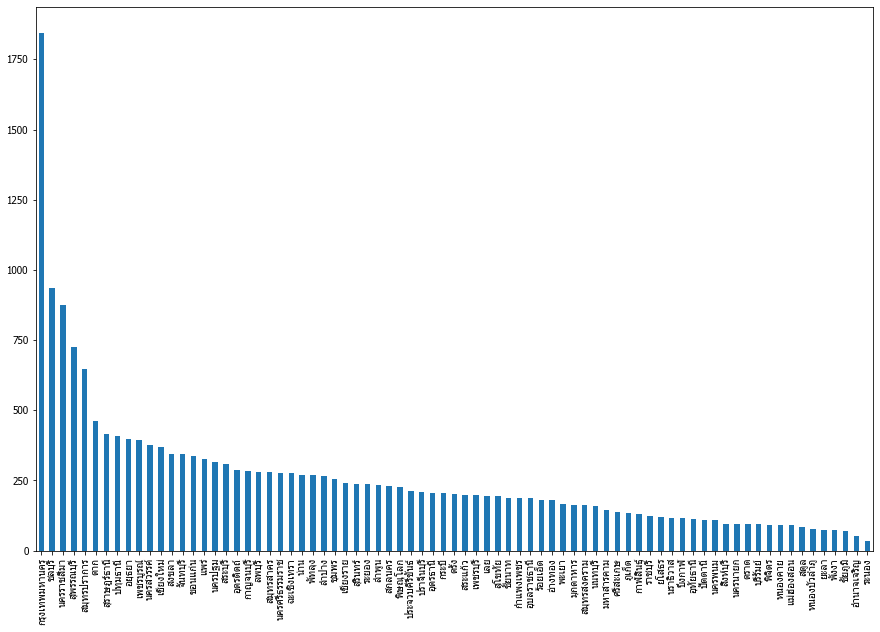

In [92]:
tag_count.plot(kind='bar', figsize=(15,10))

### Group เส้นทาง กับ จุดเกิดเหตุ

In [93]:
groupLoc = dfacci.groupby(['Route','AcciLocation'])
groupLoc.first()

AcciYear  \
Route                                              AcciLocation                                     
ฉลองรัช                                            ทางตรง                                    2019   
                                                   ทางร่วม                                   2019   
                                                   ทางลาด                                    2019   
                                                   ทางเข้าด่านเก็บเงิน                       2019   
                                                   ทางแยก                                    2019   
...                                                                                           ...   
แยกทางหลวงหมายเลข 2051 (กม.ที่ 16+000) - แหล่งท... ทางโค้งหักศอก+ไม่มีความลาดชัน/ที่ราบ      2019   
แยกทางหลวงหมายเลข 207 (กม.ที่ 21+600) - บ้านหนอ... ทางโค้งกว้าง+ไม่มีความลาดชัน/ที่ราบ       2019   
แยกทางหลวงหมายเลข 3238 (กม.ที่  3+300) - อำเภอบ... ทางตรง+ไม่มีความลาดชัน/ที่ราบ             2019   
แยกทางหลวงหมายเลข 3520 (กม.ที่ 1+000) - บ้านคชส... ทางตรง+ไม่มีความลาดชัน/ที่ราบ             2019   
แยกเฉลิมบูรพาชลทิต (กม.ที่ 52+870) - หาดแหลมเสด็จ  ทางตรง+ไม่มีความลาดชัน/ที่ราบ             2019   

                                                                                           AcciDate  \
Route                                              AcciLocation                                       
ฉลองรัช                                            ทางตรง                                08/01/2019   
                                                   ทางร่วม                               07/07/2019   
                                                   ทางลาด                                04/05/2019   
                                                   ทางเข้าด่านเก็บเงิน                   19/03/2019   
                                                   ทางแยก                                19/10/2019   
...                                                                                             ...   
แยกทางหลวงหมายเลข 2051 (กม.ที่ 16+000) - แหล่งท... ทางโค้งหักศอก+ไม่มีความลาดชัน/ที่ราบ  17/05/2019   
แยกทางหลวงหมายเลข 207 (กม.ที่ 21+600) - บ้านหนอ... ทางโค้งกว้าง+ไม่มีความลาดชัน/ที่ราบ   10/08/2019   
แยกทางหลวงหมายเลข 3238 (กม.ที่  3+300) - อำเภอบ... ทางตรง+ไม่มีความลาดชัน/ที่ราบ         13/04/2019   
แยกทางหลวงหมายเลข 3520 (กม.ที่ 1+000) - บ้านคชส... ทางตรง+ไม่มีความลาดชัน/ที่ราบ         10/08/2019   
แยกเฉลิมบูรพาชลทิต (กม.ที่ 52+870) - หาดแหลมเสด็จ  ทางตรง+ไม่มีความลาดชัน/ที่ราบ         23/08/2019   

                                                                                        AcciTime  \
Route                                              AcciLocation                                    
ฉลองรัช                                            ทางตรง                                  09:58   
                                                   ทางร่วม                                 04:35   
                                                   ทางลาด                                  12:38   
                                                   ทางเข้าด่านเก็บเงิน                     15:12   
                                                   ทางแยก                                  04:50   
...                                                                                          ...   
แยกทางหลวงหมายเลข 2051 (กม.ที่ 16+000) - แหล่งท... ทางโค้งหักศอก+ไม่มีความลาดชัน/ที่ราบ    19:54   
แยกทางหลวงหมายเลข 207 (กม.ที่ 21+600) - บ้านหนอ... ทางโค้งกว้าง+ไม่มีความลาดชัน/ที่ราบ     12:00   
แยกทางหลวงหมายเลข 3238 (กม.ที่  3+300) - อำเภอบ... ทางตรง+ไม่มีความลาดชัน/ที่ราบ           11:00   
แยกทางหลวงหมายเลข 3520 (กม.ที่ 1+000) - บ้านคชส... ทางตรง+ไม่มีความลาดชัน/ที่ราบ           21:45   
แยกเฉลิมบูรพาชลทิต (กม.ที่ 52+870) - หาดแหลมเสด็จ  ทางตรง+ไม่มีความลาดชัน/ที่ราบ           20:35   

                                                                                         ReportDate  \
Route                          

In [94]:
mprimary = dfacci.groupby(['Assumed']).count()
mprimary.head()

,AcciYear,AcciDate,AcciTime,ReportDate,ReportTime,Acc_Code,Agencies,Route,Km,Province,Car1,AcciLocation,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE,AcciMonth
Assumed,,,,,,,,,,,,,,,,,,,,
ขับตามหลังรถอื่นในระยะกระชั้นชิด,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
ขับรถผิดช่องทาง,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
ขับรถย้อนศร,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
ขับรถเร็วเกินกำหนด,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158,14158
ขับรถไม่ชำนาญ / ไม่เป็น,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201


### จำนวนผู้บาดเจ็บ / ตาย ในแต่ละเหตุการณ์

In [95]:
dead_injured

,TotInjured,TotDead
Assumed,,
ขับตามหลังรถอื่นในระยะกระชั้นชิด,30,30
ขับรถผิดช่องทาง,6,6
ขับรถย้อนศร,5,5
ขับรถเร็วเกินกำหนด,14158,14158
ขับรถไม่ชำนาญ / ไม่เป็น,201,201
ขับรถไม่เปิดไฟ / ไม่ใช้แสงสว่างตามกำหนด,8,8
ขับล้ำเข้าไปในช่องจราจรฝั่งรถสวน,12,12
คนหรือรถตัดหน้ากระชั้นชิด,1647,1647
ชนสิ่งกีดขวาง,55,55


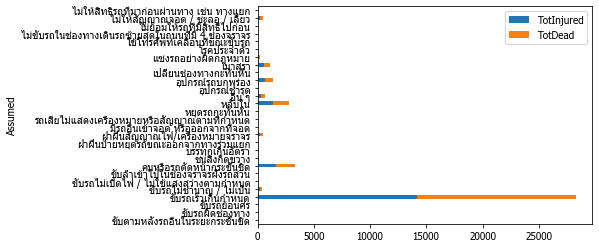

In [96]:
# mprimary['TotDead'].plot.pie(figsize=(10,10), autopct='%.2f')
dead_injured = mprimary[['TotInjured','TotDead']]
dead_injured.plot(kind='barh', stacked=True)

### จำนวนผู้เสียชีวิต ในแต่ละเดือน

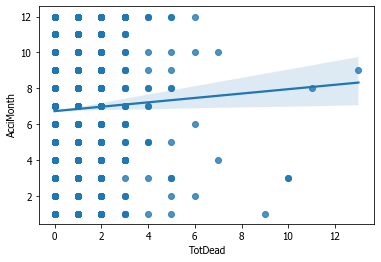

In [97]:
sns.regplot(y=dfacci['AcciMonth'], x=dfacci['TotDead'])

### Group by Month และแสดงข้อมูลจำนวนปริมาณการเกิดเหตุแต่ละเดือน

In [98]:
grpmth = dfacci.groupby('AcciMonth')
grpmth.count()

,AcciYear,AcciDate,AcciTime,ReportDate,ReportTime,Acc_Code,Agencies,Route,Km,Province,Car1,AcciLocation,Assumed,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE
AcciMonth,,,,,,,,,,,,,,,,,,,,
1,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717,1717
2,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500
3,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567,1567
4,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
5,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362,1362
6,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293,1293
7,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359,1359
8,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371,1371
9,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322,1322


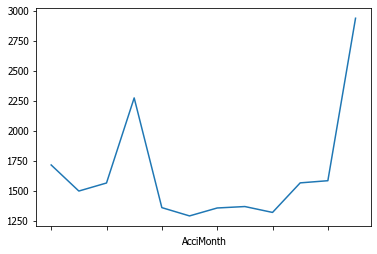

In [99]:
grpmth['AcciMonth'].count().plot()

In [100]:
#ปริมาณการเกิดอุบัติเหตุ แต่ละเดือน
dfacci["AcciMonth"].value_counts()

12    2938
4     2275
1     1717
11    1586
10    1568
3     1567
2     1500
8     1371
5     1362
7     1359
9     1322
6     1293
Name: AcciMonth, dtype: int64

### Group by date และแสดงข้อมูลจำนวนปริมาณการเกิดเหตุแต่ละวัน

In [101]:
grpdate = dfacci.groupby('AcciDate')
grpdate.count()

,AcciYear,AcciTime,ReportDate,ReportTime,Acc_Code,Agencies,Route,Km,Province,Car1,AcciLocation,Assumed,CauseOfAcci,TotCar,TotDead,TotInjured,Weather,LATITUDE,LONGITUDE,AcciMonth
AcciDate,,,,,,,,,,,,,,,,,,,,
01/01/2019,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314,314
01/02/2019,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
01/03/2019,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
01/04/2019,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66,66
01/05/2019,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/05/2019,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
31/07/2019,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56,56
31/08/2019,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41


### ข้อมูลช่วงเวลาที่เกิดเหตุ 

In [102]:
dattime = dfacci['ReportTime']
dattime_count=dattime.value_counts()
dattime_count.head(10)

09:35    104
08:12    102
10:03     83
10:06     71
09:29     69
09:47     68
09:43     67
10:04     66
10:13     66
11:09     65
Name: ReportTime, dtype: int64

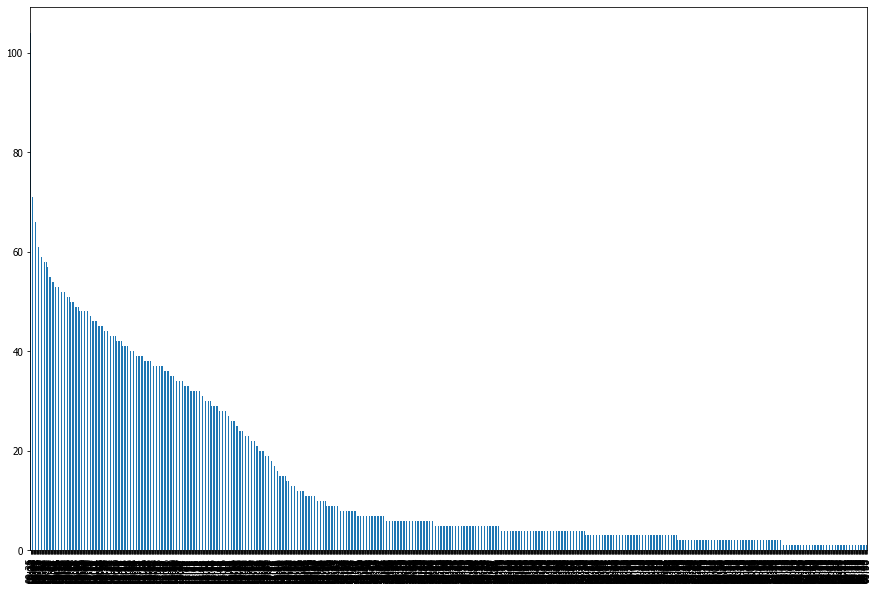

In [113]:
dattime_count.plot(kind='bar', figsize=(15,10))

### ลักษณะถนนที่เกิดอุบัติเหตุ

In [111]:
dfacci['AcciLocation'].value_counts()

ทางตรง                                                       13485
ทางโค้งปกติ                                                   2386
ทางตรง+ไม่มีความลาดชัน/ที่ราบ                                  688
ทางแยกรูปตัว T                                                 649
บนช่วงลาดชัน                                                   550
ทางแยกรูปตัว +                                                 488
ทางโค้งกว้าง+ไม่มีความลาดชัน/ที่ราบ                            309
ทางเชื่อมเข้าพื้นที่สาธารณะหรือเชิงพานิชย์ จำนวนช่องจราจร      289
ทางแยกรูปตัว Y                                                 146
ทางเชื่อมเข้าพื้นที่ส่วนบุคคล จำนวนช่องจราจร                   134
ทางสี่แยก                                                      107
ทางโค้งหักศอก                                                   78
ทางแยกต่างระดับ                                                 68
ทางโค้ง                                                         64
ทางเข้าด่านเก็บเงิน                                           

### สภาพอากาศ 
ทำให้ทราบว่าสภาพอากาศแจ่มใสเกิดอุบัติเหตุบ่อยมากที่สุด 

In [127]:
dfacci['Weather'].value_counts()

แจ่มใส                           17363
ฝนตก                              2175
อื่น ๆ                             157
หมอก/ควัน                          149
ภัยธรรมชาติ เช่น พายุ,น้ำท่วม       14
Name: Weather, dtype: int64

### จำนวนการเกิดอุบัติเหตุจำแนกตามประเภทยานพาหนะ

In [104]:
dfaccicar = dfacci["Car1"].value_counts()
dfaccicar

รถปิคอัพบรรทุก 4 ล้อ                     6404
รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ    5490
รถจักรยานยนต์                            3831
รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)          1412
อื่น ๆ                                    797
รถบรรทุก 6 ล้อ                            676
รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ      598
รถตู้                                     290
รถโดยสารมากกว่า 4 ล้อ                     157
รถปิคอัพโดยสาร                             74
คนเดินเท้า                                 64
รถสามล้อเครื่อง                            55
รถอีแต๋น                                   10
Name: Car1, dtype: int64

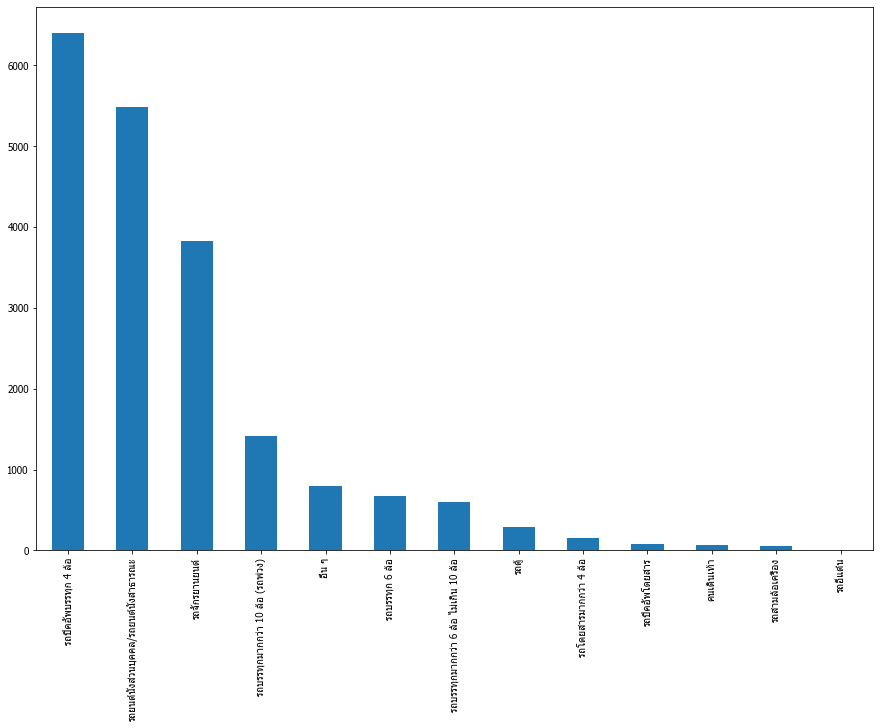

In [105]:
dfaccicar.plot(kind='bar', figsize=(15,10))

### จำนวนครั้งการเกิดอุบัติเหตุ  จำแนกตามสาเหตุ

In [106]:
cnt_acci = dfacci["Assumed"].value_counts()
cnt_acci

ขับรถเร็วเกินกำหนด                                      14158
คนหรือรถตัดหน้ากระชั้นชิด                                1647
หลับใน                                                   1399
อุปกรณ์รถบกพร่อง                                          663
เมาสุรา                                                   558
อื่น ๆ                                                    320
ไม่ให้สัญญาณจอด / ชะลอ / เลี้ยว                           253
ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร                           229
ขับรถไม่ชำนาญ / ไม่เป็น                                   201
แซงรถอย่างผิดกฎหมาย                                       125
ชนสิ่งกีดขวาง                                              55
บรรทุกเกินอัตรา                                            47
ขับตามหลังรถอื่นในระยะกระชั้นชิด                           30
เปลี่ยนช่องทางกะทันหัน                                     26
ไม่ให้สิทธิรถที่มาก่อนผ่านทาง เช่น ทางแยก                  25
ฝ่าฝืนป้ายหยุดรถขณะออกจากทางร่วมแยก                        16
หยุดรถกะ

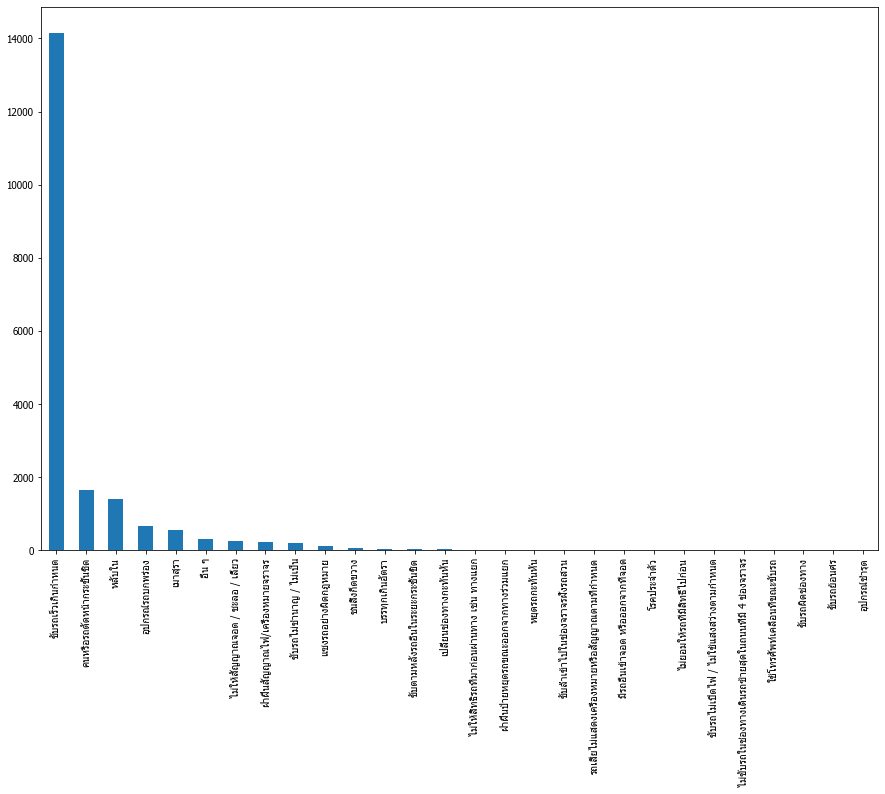

In [107]:
cnt_acci.plot(kind='bar', figsize=(15,10))

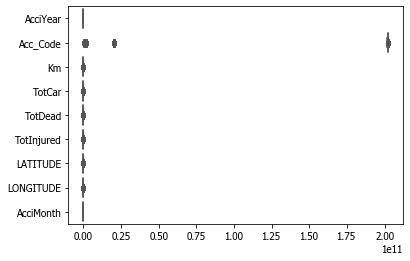

In [108]:
#Can do entire dataframe with orient='h'
sns.boxplot(data=dfacci,palette='coolwarm',orient='h')

In [114]:
dfacci['CauseOfAcci'].value_counts()

พลิกคว่ำตกถนน                               8460
ชนท้าย                                      4206
ชนอุปกรณ์งานทาง                             1669
ชนกัน/ชนยานพาหนะอื่นๆ                       1505
เฉี่ยวชน                                     963
ชนกันหรือเฉี่ยวชน                            816
อื่น ๆ                                       405
เสียหลัก ไปอยู่ในช่องจราจรอื่นๆ              312
ชนคนเดินเท้า                                 279
ชนขอบทาง                                     225
ชนรถจอด                                      197
ชนสิ่งกีดขวาง                                196
ชนในทิศทางตรงกันข้าม (ไม่ใช่การแซง)          154
ชนเป็นมุมบริเวณทางแยก                        144
พลิกคว่ำ                                      87
ชนตู้เก็บเงิน ไม้กั้นเลน อุปกรณ์เก็บเงิน      38
ชนขณะแซง                                      33
รถยนต์ชนสัตว์ รถลากจูงด้วยสัตว์               28
รถยนต์ชนวัตถุ สิ่งของ                         26
รถยนต์ชนรถไฟ                                  23
รถยนต์ชนรถจักรยานยนต

### จำนวนผู้บาดเจ็บและเสียชีวิต  จำแนกตามประเภทพาหนะ

In [109]:
dfacci.groupby(['Car1']).sum()

,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE
Car1,,,,,,,,
คนเดินเท้า,129216,11105259221224,6044.431,57,52,24,976.677465,6474.752950
รถจักรยานยนต์,7734789,719090180526245,369564.982,6504,1402,3831,55750.263431,386101.253212
รถตู้,585510,53209093553083,42142.971,432,74,706,3822.094787,27332.958727
รถบรรทุก 6 ล้อ,1364844,121862127482187,90002.488,958,90,547,9208.498050,64416.683971
รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),2850828,258560171524660,173127.261,2071,164,746,19342.820504,135688.025337
รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,1207362,107546392650512,72084.328,904,62,436,7894.112695,56672.592617
รถปิคอัพบรรทุก 4 ล้อ,12929676,1176278617952285,976843.801,9132,673,5912,88260.298962,624224.107143
รถปิคอัพโดยสาร,149406,14196231720187,6702.987,112,19,161,1127.600877,7443.757297
รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,11084310,1011764409680768,658794.253,9258,558,4710,72553.843289,515363.840611


In [124]:
car = dfacci.groupby(['Car1']).sum()
car1 = car[['TotDead','TotInjured']]
# car['TotDead'].count
car1

,TotDead,TotInjured
Car1,,
คนเดินเท้า,52,24
รถจักรยานยนต์,1402,3831
รถตู้,74,706
รถบรรทุก 6 ล้อ,90,547
รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง),164,746
รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ,62,436
รถปิคอัพบรรทุก 4 ล้อ,673,5912
รถปิคอัพโดยสาร,19,161
รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,558,4710


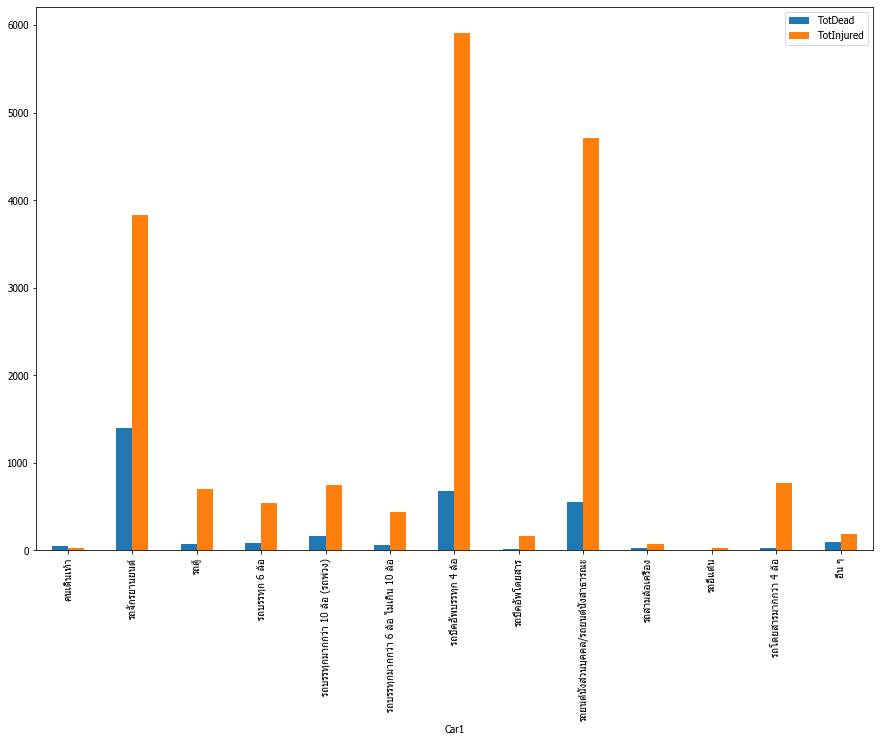

In [125]:
car1.plot(kind='bar', figsize=(15,10))# 

### จำนวนการเกิดอุบัติเหตุแยกตามวันที่

In [122]:
accdate = dfacci["AcciDate"].value_counts()
accdate.head(20)

28/12/2019    399
29/12/2019    330
01/01/2019    314
13/04/2019    294
30/12/2019    277
31/12/2019    270
14/04/2019    264
27/12/2019    263
12/04/2019    245
11/04/2019    232
15/04/2019    210
02/01/2019    192
16/04/2019    177
17/04/2019    170
02/07/2019     88
25/03/2019     85
16/03/2019     79
03/07/2019     76
17/02/2019     76
08/01/2019     76
Name: AcciDate, dtype: int64

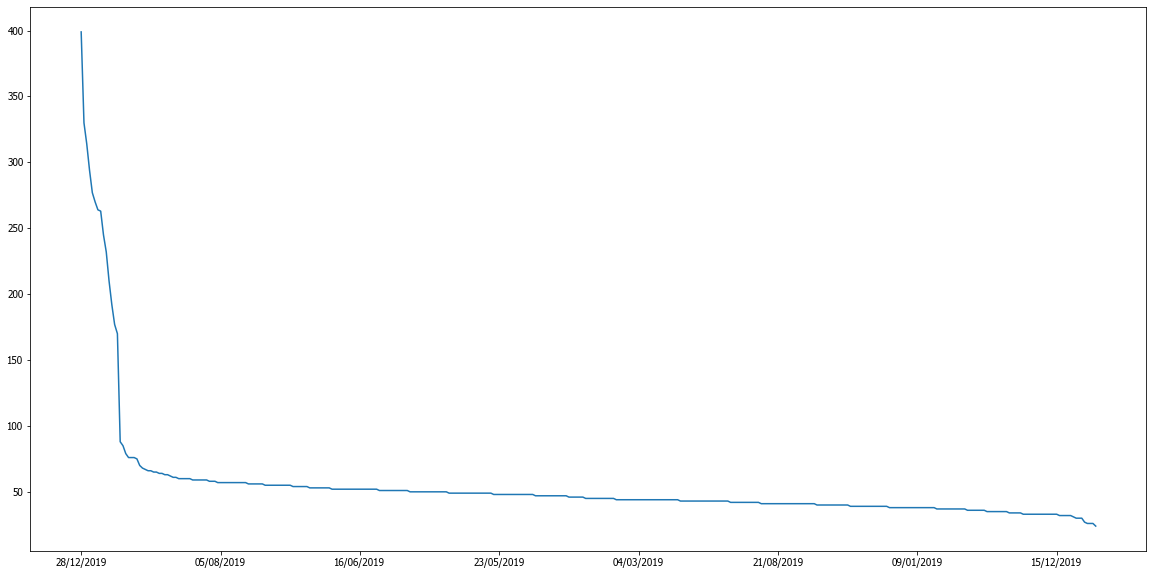

In [123]:
accdate.plot(figsize=(20,10))

# เขียนอภิปราย Findings 
ข้อมูลอุบัติเหตุ ปี 2019
 - จากการสำรวจข้อมูลการเกิดอุบัติเหตุบนทองถนนของ กรมทางหลวง , กรมทางหลวงชนบท , กรมการทางพิเศษแห่งประเทศไทย จะเห็นได้ว่าข้อมูลของกรมการทางพิเศษแห่งประเทศไทย ไม่มีข้อมูล Lat/Long ถ้าเราจะ Drop ข้อมูลทิ้งไปจะส่งผลให้ข้อมูลของกรมการทางพิเศษถูกลบทิ้งไปหมดด้วย เลยจะทำให้การวิเคราะห์ข้อมูลไม่ถูกต้อง เลยต้องทำการ assign ค่าเข้าไปทดแทน

หน่วนงานที่รับผิดชอบ
1กรมทางหลวง
2กรมทางหลวงชนบท
และ 3การทางพิเศษแห่งประเทศไทย

จำนวนการเกิดอุบัติเหตุทั้งปี เกิด 19,858 ครั้ง

-เดือนที่เกิดอุบัติเหตุมากที่สุด 5 อันดับแรกได้แก่
ธันวาคม เกิดอุบัติเหตุ 2,938 ครั้ง
เดือนเมษายน เกิดอุบัติเหตุ 2,275 ครั้ง
มกราคม เกิดอุบัติเหตุ 1,717 ครั้ง
พฤศจิกายน เกิดอุบัติเหตุ 1,586 ครั้ง
ตุลาคม เกิดอุบัติเหตุ 1,568 ครั้ง
เนื่องจากเดือน ธันวาคม มีวันหยุดเยอะทำให้เกิดการเดินทางไปต่างจังหวัด จึงทำให้จำนวนการเกิดอุบัติเหตุเป็นอันดับ 1 
เดือนเมษายน มีวันหยุดช่วงเทศกาลสงกรานต์  และอันดับ 3 เดือนมกราคม ซึ่งเป็นวันหยุดต่อเนื่องจากวันสิ้นปี

-วันที่เกิดอุบัติเหตุมากที่สุด 5 อันดับแรกได้แก่
วันที่ 28/12/2019 เกิดอุบัติเหตุ 399 ครั้ง
วันที่29/12/2019 เกิดอุบัติเหตุ 330 ครั้ง
วันที่ 01/01/2019 เกิดอุบัติเหตุ 314 ครั้ง
วันที่ 13/04/2019 เกิดอุบัติเหตุ 294 ครั้ง
วันที่ 30/12/2019 เกิดอุบัติเหตุ 277 ครั้ง
จากข้อมูลจะเกิดในช่วงเทศกาลปีใหม่และสงกรานต์

จังหวัดที่เกิดอุบัติเหตุ 5 อันดับแรกได้แก่
1 กรุงเทพมหานคร  1,844 ครั้ง
2 ชลบุรี 936 ครั้ง
3 นครราชสีมา 876 ครั้ง
4 สุพรรณบุรี 727 ครั้ง
5 สมุทรปราการ 648 ครั้ง

-สาเหตุการเกิดอุบัติเหตุ 5 อันดับ
ขับรถเร็วเกินกำหนด 14,158 ครั้ง
คนหรือรถตัดหน้ากระชั้นชิด 1,647 ครั้ง
หลับใน  1,399 ครั้ง
อุปกรณ์รถบกพร่อง  663 ครั้ง
เมาสุรา 558 ครั้ง

-ประเภทยานพาหนะที่เกิดอุบัติเหตุ 
รถปิคอัพบรรทุก 4 ล้อ  6,404 ครั้ง
รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ 5,490 ครั้ง
รถจักรยานยนต์    3,831 ครั้ง
รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)  1,412 ครั้ง
รถบรรทุก 6 ล้อ  676 ครั้ง
รถตู้   290 ครั้ง
รถโดยสารมากกว่า 4 ล้อ 157 ครั้ง
รถปิคอัพโดยสาร  74 ครั้ง
คนเดินเท้า 64 ครั้ง
รถสามล้อเครื่อง 55 ครั้ง
รถอีแต๋น  10 ครั้ง

ปี 2019 การบาดเจ็บ และเสียชีวิต ที่เกิดจากอุบัติเหตุบนท้องถนน ดังนี้
บาดเจ็บ 18,136 ราย
เสียชีวิต 3,251 ราย

-จำนวนผู้บาดเจ็บ และ เสียชีวิต จำแนกตามประเภทรถ
บาดเจ็บ 3,831 ราย เสียชีวิต 1,402 ราย  จากการใช้รถจักรยานยนต์
บาดเจ็บ 5,912 ราย เสียชีวิต 673 ราย  จากการใช้รถปิคอัพบรรทุก 4 ล้อ
บาดเจ็บ 4,710 ราย เสียชีวิต 558 ราย  จากการใช้รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ
บาดเจ็บ 746 ราย เสียชีวิต 164 ราย  จากการใช้รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)	
บาดเจ็บ 547 ราย เสียชีวิต 90 ราย  จากการใช้รถบรรทุก 6 ล้อ
บาดเจ็บ 706 ราย เสียชีวิต 74 ราย  จากการใช้รถตู้
บาดเจ็บ 436 ราย เสียชีวิต 62 ราย  จากการใช้รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ
บาดเจ็บ 52 ราย เสียชีวิต 24 ราย  คนเดินเท้า
บาดเจ็บ 774 ราย เสียชีวิต 30 ราย  จากรถโดยสารมากกว่า 4 ล้อ
บาดเจ็บ 71 ราย เสียชีวิต 29 ราย  จากรถสามล้อเครื่อง


# สร้าง Model
ขั้นตอนต่อไปเราจะสร้าง Model เพื่อหาคำตอบที่เราต้องการ
จำนวนการตายจากอุบัติเหตุแต่ละวัน โดยทำการกรุ๊ปรวมข้อมูลในแต่วัน

In [128]:
new_dfacci=dfacci.groupby(['AcciDate']).sum()

In [129]:
new_dfacci

,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE
AcciDate,,,,,,,,
01/01/2019,633966,63033526346673,29298.994,520,53,296,4484.777292,31507.231491
01/02/2019,96912,9691310153633,7641.371,80,11,43,664.492861,4743.529783
01/03/2019,88836,8702039459481,3412.398,67,6,41,614.703167,4340.484282
01/04/2019,133254,11672089688121,8188.002,107,4,67,943.715153,6451.734409
01/05/2019,86817,3593920034465,5684.308,62,8,26,566.306668,4142.476185
...,...,...,...,...,...,...,...,...
31/05/2019,70665,6884999542864,6625.512,53,5,50,490.217838,3237.577524
31/07/2019,113064,11306854533476,6931.457,83,7,28,760.678350,5251.518819
31/08/2019,82779,8278280200970,5685.743,61,8,31,603.025235,4139.756258


### ดูความสัมพันธ์ในแต่ละตัวแปร

In [130]:
new_dfacci.corr()

,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE
AcciYear,1.000000,0.979253,0.931188,0.994234,0.834039,0.963634,0.998369,0.999105
Acc_Code,0.979253,1.000000,0.911855,0.973521,0.803403,0.937554,0.978270,0.978876
Km,0.931188,0.911855,1.000000,0.917703,0.773636,0.896112,0.929632,0.932875
TotCar,0.994234,0.973521,0.917703,1.000000,0.833659,0.958210,0.990990,0.992265
TotDead,0.834039,0.803403,0.773636,0.833659,1.000000,0.819291,0.835812,0.836022
TotInjured,0.963634,0.937554,0.896112,0.958210,0.819291,1.000000,0.964267,0.965208
LATITUDE,0.998369,0.978270,0.929632,0.990990,0.835812,0.964267,1.000000,0.999201
LONGITUDE,0.999105,0.978876,0.932875,0.992265,0.836022,0.965208,0.999201,1.000000


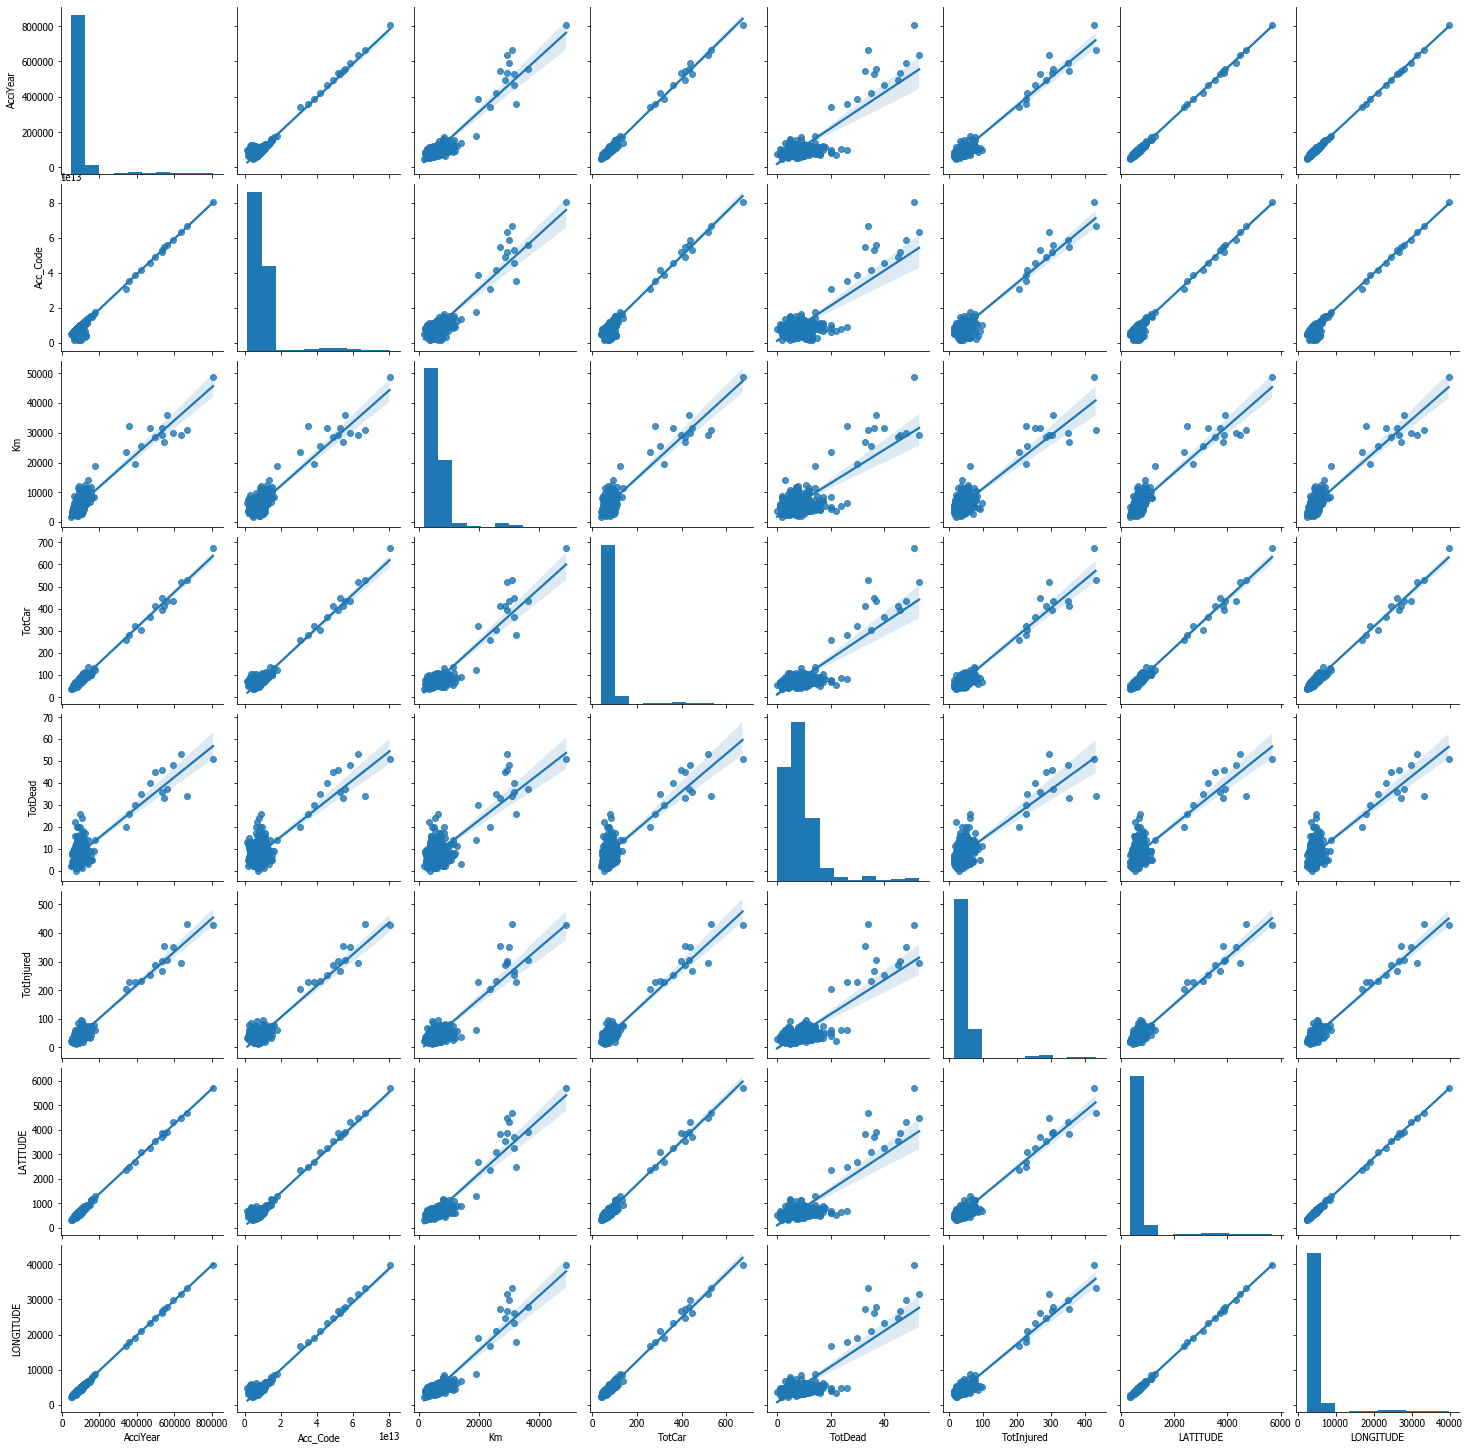

In [131]:
sns.pairplot(new_dfacci,kind='reg')

## เลือกโมเดลโดยใช้ linear regression 

In [132]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### กำหนดตัวแปรโดยให้ จำนวนรถและจำนวนผู้บาดเจ็บ เป็นตัวแปร x และกำหนดให้ y เป็นจำนวนการตาย 
### เพื่อสร้างโมเดลพยากรณ์ประมาณการคนตาย

In [133]:
#split dataset in features and target variable
feature_cols = ['TotCar','TotInjured']
X = new_dfacci[feature_cols] # Features
y = new_dfacci.TotDead # Target variable

In [134]:
X.head(10)

,TotCar,TotInjured
AcciDate,,
01/01/2019,520,296
01/02/2019,80,43
01/03/2019,67,41
01/04/2019,107,67
01/05/2019,62,26
01/06/2019,51,36
01/07/2019,79,32
01/08/2019,76,35
01/09/2019,57,32


In [135]:
X.shape

(365, 2)

In [136]:
y.head()

AcciDate
01/01/2019    53
01/02/2019    11
01/03/2019     6
01/04/2019     4
01/05/2019     8
Name: TotDead, dtype: int64

### มาแยกชุดข้อมูลโดยใช้ฟังก์ชัน train_test_split () และกำหนดข้อมูลtrainที่ 70% test 30% และrandaom state ที่ 100 หากไม่กำหนด random state หากรัน code ใหม่ ค่าที่ได้จะเปลี่ยนไป

In [137]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [138]:
print(len(X_train))
print(len(X_test))

255
110


In [139]:
X_train.head()

,TotCar,TotInjured
AcciDate,,
28/03/2019,62,46
01/11/2019,89,49
15/07/2019,53,36
10/11/2019,85,61
21/03/2019,74,36


In [140]:
X_test.head()

,TotCar,TotInjured
AcciDate,,
13/04/2019,436,351
11/06/2019,76,32
27/03/2019,70,55
05/09/2019,55,13
21/02/2019,66,33


In [141]:
y_train.head()

AcciDate
28/03/2019     3
01/11/2019     9
15/07/2019     2
10/11/2019    24
21/03/2019     7
Name: TotDead, dtype: int64

In [142]:
y_test.head()

AcciDate
13/04/2019    48
11/06/2019     4
27/03/2019     6
05/09/2019     5
21/02/2019     5
Name: TotDead, dtype: int64

### ทำการ fit model 

In [143]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### ทดสอบประสิทธิภาพ model

In [144]:
model.score(X,y) #R-squared

0.700108242849985

In [145]:
print("Training set score (R2): {:.2f}".format(model.score(X_train, y_train)))
print("Test set score (R2): {:.2f}".format(model.score(X_test, y_test)))

Training set score (R2): 0.71
Test set score (R2): 0.67


In [146]:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.700108242849985
intercept: 2.047189878199358
coefficients: [0.06121579 0.0342223 ]


### import statmodels เพื่อดูข้อมูลสถิติที่ละเอียดขึ้น

In [147]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [148]:
model_a = smf.ols(formula='TotDead ~ TotCar+ TotInjured', data=new_dfacci[:]).fit()
#model_a = smf.ols(formula='TotDead ~ TotCar', data=new_dfacci[:]).fit()

### จากข้อมูลสถิติ จะได้ว่า ตัวแบบมีความเหมาะสม ค่าP Value ไม่เกิน 0.05 โดยมีสมการดังนี้ 
#### y=2.0472+x1(0.0612)+x2(0.0342)

In [149]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                TotDead   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     422.6
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           2.14e-95
Time:                        20:17:54   Log-Likelihood:                -1023.3
No. Observations:                 365   AIC:                             2053.
Df Residuals:                     362   BIC:                             2064.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0472      0.361      5.676      0.0

In [150]:
model_a.pvalues

Intercept     2.835034e-08
TotCar        8.197241e-09
TotInjured    1.336589e-02
dtype: float64

## ทำการ predict ค่า y 

In [151]:
# predict 
y_pred=model.predict(X_test)
print(y_pred)

[40.74930049  7.79470336  8.2145215   5.85894813  7.21676778  5.79965409
  7.17870199  8.25212912  6.33806031  8.4160118   8.47722759  7.62020655
  6.41904078  7.28182705  7.66504298  6.16887056  8.43577648  7.89206319
  7.89737026  5.62131378  9.00648326  8.14946222  8.12439048  7.63997123
  7.84530502  7.42402331  7.36619284  9.73576566  6.86393066  8.53313631
  9.09130722  6.17225588  5.8825563   7.86168439  6.8475513   8.61411678
  6.41565546  8.05594588  6.49663593  8.67533257  7.3411211   7.99280835
  8.08293937  8.864287    6.40119784  8.36010308  7.48331736  6.91068883
  6.58292346  7.87229851  7.82169685 10.82703572 28.56214057  9.36316386
  8.70763313  5.71867362  8.00534422 10.0418446  11.66429208  9.25326816
  9.59210583  7.90267732  8.64303202  5.77073885  6.35782499 49.33680659
  9.12937301  7.97835073  6.68943385  7.51031085  7.0027416  10.89017326
  6.50725006  7.43463744  7.26206237  8.17114865  9.55641995  9.09130722
 36.62377632  5.88063456  8.41262648  8.79199892  7

In [152]:
#y_pred.sum()

## ลองกำหนดตัวแปร โดยสมมุติเราทราบจำนวนรถและจำนวนคนเกิดอุบัติเหตุ 
#### โดยกำหนดจำนวนรถ500 จำนวนคนที่เกิดอุบัติเหตุ 1000 โมเดลจะปรมาณการว่ามีคนเสียชีวิตประมาณ 67 คน

In [153]:
model.predict([[500, 1000]])

array([66.87738276])

### สามารถแทนค่าเพื่อทำการประมาณการได้มากกว่า 1 ค่า

In [173]:
model.predict([[200, 40], 
               [100, 80],
               [ 10, 1]])

array([15.65923953, 10.90655262,  2.69357006])

### ทำการconcat โดยสร้าง colunm predicted ใส่ใน colunm สุดท้าย

In [155]:
dc=pd.concat([new_dfacci[:].reset_index(),pd.Series(y_pred, name='predicted')],axis='columns')
dc.head(10)

,AcciDate,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE,predicted
0,01/01/2019,633966,63033526346673,29298.994,520,53,296,4484.777292,31507.231491,40.749300
1,01/02/2019,96912,9691310153633,7641.371,80,11,43,664.492861,4743.529783,7.794703
2,01/03/2019,88836,8702039459481,3412.398,67,6,41,614.703167,4340.484282,8.214521
3,01/04/2019,133254,11672089688121,8188.002,107,4,67,943.715153,6451.734409,5.858948
4,01/05/2019,86817,3593920034465,5684.308,62,8,26,566.306668,4142.476185,7.216768
5,01/06/2019,80760,8076255477963,5961.427,51,2,36,556.521625,3834.468078,5.799654
6,01/07/2019,100950,10095367975704,5562.039,79,7,32,612.320942,4535.627100,7.178702
7,01/08/2019,119121,11912590565034,11037.790,76,8,35,826.211694,5833.810250,8.252129
8,01/09/2019,74703,7270848580926,4844.895,57,5,32,519.839071,3743.983932,6.338060
9,01/10/2019,64608,6279407917794,3580.826,49,9,21,471.986132,3132.431974,8.416012


### ทำการสร้าง dataframe โดยแสดงเฉพะข้อมูลที่ต้องการ

In [156]:
dcperdict=dc[['AcciDate','TotCar','TotInjured','TotDead','predicted']]
dcperdict.head(10)

,AcciDate,TotCar,TotInjured,TotDead,predicted
0,01/01/2019,520,296,53,40.749300
1,01/02/2019,80,43,11,7.794703
2,01/03/2019,67,41,6,8.214521
3,01/04/2019,107,67,4,5.858948
4,01/05/2019,62,26,8,7.216768
5,01/06/2019,51,36,2,5.799654
6,01/07/2019,79,32,7,7.178702
7,01/08/2019,76,35,8,8.252129
8,01/09/2019,57,32,5,6.338060
9,01/10/2019,49,21,9,8.416012


# Ridge regression

In [157]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

RR = Ridge(alpha=1.0)
RR = RR.fit(X_train, y_train)
y_RR_predict = RR.predict(X_test)
mse_RR = mean_squared_error(y_test, y_RR_predict)

print("RR.coef_: {}".format(RR.coef_))
print("RR.intercept_: {}".format(RR.intercept_))

RR.coef_: [0.0694989  0.02070171]
RR.intercept_: 2.202118239587496


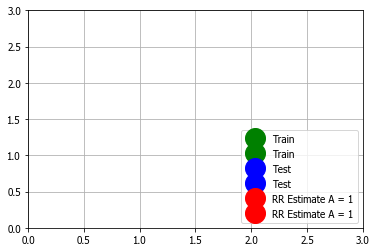

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.axis([0,3,0,3])
plt.grid()
plt.plot(X_train, y_train, 'og',label='Train', markersize = 20)
plt.plot(X_test, y_test, 'ob',label='Test', markersize = 20)
plt.plot(X_test, y_RR_predict, 'or',label='RR Estimate A = 1', markersize = 20)
plt.legend(loc='lower right')

In [159]:
# The mean squared error
mse_train = mean_squared_error(y_train, RR.predict(X_train))
mse_test=mean_squared_error(y_test, RR.predict(X_test))
print("Mean squared error (train): %.2f" % mse_train)
print("Mean squared error (test): %.2f" % mse_test)

Mean squared error (train): 14.39
Mean squared error (test): 19.84


In [160]:
RR.score(X,y)

0.6984863216407994

In [161]:
dc=pd.concat([new_dfacci[:].reset_index(),pd.Series(y_RR_predict, name='predicted')],axis='columns')
dc.head(10)

,AcciDate,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE,predicted
0,01/01/2019,633966,63033526346673,29298.994,520,53,296,4484.777292,31507.231491,39.769937
1,01/02/2019,96912,9691310153633,7641.371,80,11,43,664.492861,4743.529783,8.146489
2,01/03/2019,88836,8702039459481,3412.398,67,6,41,614.703167,4340.484282,8.205635
3,01/04/2019,133254,11672089688121,8188.002,107,4,67,943.715153,6451.734409,6.293680
4,01/05/2019,86817,3593920034465,5684.308,62,8,26,566.306668,4142.476185,7.472202
5,01/06/2019,80760,8076255477963,5961.427,51,2,36,556.521625,3834.468078,6.063002
6,01/07/2019,100950,10095367975704,5562.039,79,7,32,612.320942,4535.627100,7.773858
7,01/08/2019,119121,11912590565034,11037.790,76,8,35,826.211694,5833.810250,8.520600
8,01/09/2019,74703,7270848580926,4844.895,57,5,32,519.839071,3743.983932,6.583504
9,01/10/2019,64608,6279407917794,3580.826,49,9,21,471.986132,3132.431974,8.652204


# Lasso Regression

In [162]:
from sklearn.linear_model import Lasso

LL = Lasso(alpha=0.05)
LL = LL.fit(X_train, y_train)
y_LL_predict = LL.predict(X_test)
mse_LL = mean_squared_error(y_test, y_LL_predict)


print("LL.coef_: {}".format(LL.coef_))
print("LL.intercept_: {}".format(LL.intercept_))

LL.coef_: [0.06959324 0.02055598]
LL.intercept_: 2.2014018913089846


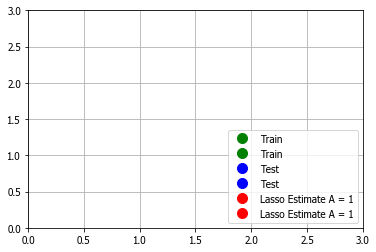

In [163]:
%matplotlib inline
plt.axis([0,3,0,3])
plt.grid()
plt.plot(X_train, y_train, 'og',label='Train', markersize = 10)
plt.plot(X_test, y_test, 'ob',label='Test', markersize = 10)
plt.plot(X_test, y_LL_predict, 'or',label='Lasso Estimate A = 1', markersize = 10)
plt.legend(loc='lower right')

In [164]:
# The mean squared error
mse_train = mean_squared_error(y_train, LL.predict(X_train))
mse_test=mean_squared_error(y_test, LL.predict(X_test))
print("Mean squared error (train): %.2f" % mse_train)
print("Mean squared error (test): %.2f" % mse_test)

Mean squared error (train): 14.39
Mean squared error (test): 19.85


In [165]:
#R2 score (coefficient of determination)
print("Training set score (R2): {:.2f}".format(LL.score(X_train, y_train)))
print("Test set score (R2): {:.2f}".format(LL.score(X_test, y_test)))

Training set score (R2): 0.71
Test set score (R2): 0.66


In [166]:
LL.score(X,y)

0.6984660165734451

In [167]:
dc=pd.concat([new_dfacci[:].reset_index(),pd.Series(y_LL_predict, name='predicted')],axis='columns')
dc.head(10)

,AcciDate,AcciYear,Acc_Code,Km,TotCar,TotDead,TotInjured,LATITUDE,LONGITUDE,predicted
0,01/01/2019,633966,63033526346673,29298.994,520,53,296,4484.777292,31507.231491,39.759202
1,01/02/2019,96912,9691310153633,7641.371,80,11,43,664.492861,4743.529783,8.148279
2,01/03/2019,88836,8702039459481,3412.398,67,6,41,614.703167,4340.484282,8.203507
3,01/04/2019,133254,11672089688121,8188.002,107,4,67,943.715153,6451.734409,6.296258
4,01/05/2019,86817,3593920034465,5684.308,62,8,26,566.306668,4142.476185,7.472903
5,01/06/2019,80760,8076255477963,5961.427,51,2,36,556.521625,3834.468078,6.063702
6,01/07/2019,100950,10095367975704,5562.039,79,7,32,612.320942,4535.627100,7.778272
7,01/08/2019,119121,11912590565034,11037.790,76,8,35,826.211694,5833.810250,8.521507
8,01/09/2019,74703,7270848580926,4844.895,57,5,32,519.839071,3743.983932,6.584041
9,01/10/2019,64608,6279407917794,3580.826,49,9,21,471.986132,3132.431974,8.652768


## เขียนอภิปราย Findings
ข้อมูลอุบัติเหตุ ปี 2019

จากการสำรวจข้อมูลการเกิดอุบัติเหตุบนทองถนนของ กรมทางหลวง , กรมทางหลวงชนบท , กรมการทางพิเศษแห่งประเทศไทย จะเห็นได้ว่าข้อมูลของกรมการทางพิเศษแห่งประเทศไทย ไม่มีข้อมูล Lat/Long ถ้าเราจะ Drop ข้อมูลทิ้งไปจะส่งผลให้ข้อมูลของกรมการทางพิเศษถูกลบทิ้งไปหมดด้วย เลยจะทำให้การวิเคราะห์ข้อมูลไม่ถูกต้อง เลยต้องทำการ assign ค่าเข้าไปทดแทน
หน่วนงานที่รับผิดชอบ 1กรมทางหลวง 2กรมทางหลวงชนบท และ 3การทางพิเศษแห่งประเทศไทย

จำนวนการเกิดอุบัติเหตุทั้งปี เกิด 19,858 ครั้ง

-เดือนที่เกิดอุบัติเหตุมากที่สุด 5 อันดับแรกได้แก่ ธันวาคม เกิดอุบัติเหตุ 2,938 ครั้ง เดือนเมษายน เกิดอุบัติเหตุ 2,275 ครั้ง มกราคม เกิดอุบัติเหตุ 1,717 ครั้ง พฤศจิกายน เกิดอุบัติเหตุ 1,586 ครั้ง ตุลาคม เกิดอุบัติเหตุ 1,568 ครั้ง เนื่องจากเดือน ธันวาคม มีวันหยุดเยอะทำให้เกิดการเดินทางไปต่างจังหวัด จึงทำให้จำนวนการเกิดอุบัติเหตุเป็นอันดับ 1 เดือนเมษายน มีวันหยุดช่วงเทศกาลสงกรานต์ และอันดับ 3 เดือนมกราคม ซึ่งเป็นวันหยุดต่อเนื่องจากวันสิ้นปี

-วันที่เกิดอุบัติเหตุมากที่สุด 5 อันดับแรกได้แก่ วันที่ 28/12/2019 เกิดอุบัติเหตุ 399 ครั้ง วันที่29/12/2019 เกิดอุบัติเหตุ 330 ครั้ง วันที่ 01/01/2019 เกิดอุบัติเหตุ 314 ครั้ง วันที่ 13/04/2019 เกิดอุบัติเหตุ 294 ครั้ง วันที่ 30/12/2019 เกิดอุบัติเหตุ 277 ครั้ง จากข้อมูลจะเกิดในช่วงเทศกาลปีใหม่และสงกรานต์

จังหวัดที่เกิดอุบัติเหตุ 5 อันดับแรกได้แก่ 1 กรุงเทพมหานคร 1,844 ครั้ง 2 ชลบุรี 936 ครั้ง 3 นครราชสีมา 876 ครั้ง 4 สุพรรณบุรี 727 ครั้ง 5 สมุทรปราการ 648 ครั้ง

-สาเหตุการเกิดอุบัติเหตุ 5 อันดับ ขับรถเร็วเกินกำหนด 14,158 ครั้ง คนหรือรถตัดหน้ากระชั้นชิด 1,647 ครั้ง หลับใน 1,399 ครั้ง อุปกรณ์รถบกพร่อง 663 ครั้ง เมาสุรา 558 ครั้ง
-ลักษณะถนนที่เกิดเหตุ ทางตรงเกิดอุบัติเหตุถึง 13,485 ครั้ง ทางตรงสามารถทำความเร็วได้ซึ่งสอดคล้องกับสาเหตุขับรถเร็ว

-ประเภทยานพาหนะที่เกิดอุบัติเหตุ รถปิคอัพบรรทุก 4 ล้อ 6,404 ครั้ง รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ 5,490 ครั้ง รถจักรยานยนต์ 3,831 ครั้ง รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง) 1,412 ครั้ง รถบรรทุก 6 ล้อ 676 ครั้ง รถตู้ 290 ครั้ง รถโดยสารมากกว่า 4 ล้อ 157 ครั้ง รถปิคอัพโดยสาร 74 ครั้ง คนเดินเท้า 64 ครั้ง รถสามล้อเครื่อง 55 ครั้ง รถอีแต๋น 10 ครั้ง

ปี 2019 การบาดเจ็บ และเสียชีวิต ที่เกิดจากอุบัติเหตุบนท้องถนน ดังนี้ บาดเจ็บ 18,136 ราย เสียชีวิต 3,251 ราย

-จำนวนผู้บาดเจ็บ และ เสียชีวิต จำแนกตามประเภทรถ บาดเจ็บ 3,831 ราย เสียชีวิต 1,402 ราย จากการใช้รถจักรยานยนต์ บาดเจ็บ 5,912 ราย เสียชีวิต 673 ราย จากการใช้รถปิคอัพบรรทุก 4 ล้อ บาดเจ็บ 4,710 ราย เสียชีวิต 558 ราย จากการใช้รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ บาดเจ็บ 746 ราย เสียชีวิต 164 ราย จากการใช้รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)
บาดเจ็บ 547 ราย เสียชีวิต 90 ราย จากการใช้รถบรรทุก 6 ล้อ บาดเจ็บ 706 ราย เสียชีวิต 74 ราย จากการใช้รถตู้ บาดเจ็บ 436 ราย เสียชีวิต 62 ราย จากการใช้รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ บาดเจ็บ 52 ราย เสียชีวิต 24 ราย คนเดินเท้า บาดเจ็บ 774 ราย เสียชีวิต 30 ราย จากรถโดยสารมากกว่า 4 ล้อ บาดเจ็บ 71 ราย เสียชีวิต 29 ราย จากรถสามล้อเครื่อง

ช่วงเวลาที่เกิดเหตุบ่อยจะเป็นช่วงประมาณ 8โมง ถึง 11 โมง ซึ่งเป็นช่วงเวลาเช้าซึ่งข้อมูลนี้สามารถที่จะให้เจ้าหน้าที่ลงพื้นที่ในช่วงเวลาดังกล่าว เพื่อกวดขันการจราจรเพิ่มขึ้นเพื่อลดการเกิดอุบัติเหตุ

## เขียนอภิปราย model
จากโมเดลที่นำมาใช้ได้แก linear regression ,Ridge regression และ Lasso Regression พิจารณาจากประสิทธิภาพ ค่า R-squared แต่ละโมเดลได้ดังนี้ 
Linear regression 0.700108242849985 
Ridge regression 0.6984863216407994 
Lasso Regression 0.6984660165734451
จะเห็นได้ว่าในแต่ละ model มีค่าไม่ค่อยแตกต่างกัน แต่ Linear regression มีค่ามากที่สุด จึงเลือกใช้ตัวแบบ Linear regression ค่าR-squared ที่ 0.7 ซึ่งมีความแม่นยำพอสมควร 
สมการที่ได้ y=2.0472+x1(0.0612)+x2(0.0342) 

ประมาณการเกิดอุบัติเหตุโดยเรา assume ว่าในแต่ปี การเกิดอุบัติเหตุในแต่ละวันมีปริมาณที่ไม่แตกต่างกัน	
โดยโมเดลได้พยากรณ์การเกิดอุบัติเหตุิ ดังนี้ โดยยกตัวอย่าง 10 วันแรกดังนี้
วันที่ 1/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 41 ราย
วันที่ 2/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 8 ราย
วันที่ 3/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 6 ราย
วันที่ 4/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 6 ราย
วันที่ 5/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 8 ราย
วันที่ 6/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 6 ราย
วันที่ 7/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 8 ราย
วันที่ 8/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 9 ราย
วันที่ 9/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 6 ราย
วันที่ 10/1/2019 เกิดจำนวนผู้เสียชีวิตจากอุบัติเหตุจำนวน 9 ราย
จะเห็นได้ว่าเมื่อเทียบผลที่ได้จากการพยากรณ์กับข้อมูล โมเดลทำได้ค่อนข้างแม่นยำ
การประมาณโดยใช้ model นี้จะมีวัตถุประสงค์เพื่อให้เจ้าหน้าที่ประมาณการว่าวันไหนเกิดเหตุเยอะก็ควรลงปฎิบัติหน้าที่หรือวางมาตรการป้องกันให้มากขึ้นเพื่อลดการศูนย์เสียที่จะเกิดขึ้นได้

### สรุป 
จากผลลัพธ์ที่ได้สามารถให้ตำรวจหรือหน่วยงานที่เกี่ยวข้องนำไปเป็นแนวทางในการตั้งรับหรือออกมาตรการป้องกันอุบัติเหตุได้ เพื่อที่จะลดการศูนย์เสียที่ไม่คาดคิดขึ้นได้ในอนาคต
โดยเฉพาะอย่างยิ่งการกวดขันในเรื่องความเร็วในการขับขี่ซึ่งเป็นสาเหตุที่เกิดอุบัติเหตุเป็นอันดับที่ 1 โดยคิดเป็น 71.29% จากจำนวนครั้งที่เกิดอุบัติเหตุทั้งหมด และเราก็ทราบช่วงเวลาที่เกิดอุบัติเหตุบ่อยครั้งจะเกิดที่ประมาณ 8โมงถึง 11 โมง ข้อมูลตรงนี้เราก็จะสามารถทำให้ตำรวจหรือหน่วยงานที่เกี่ยวข้องออกมาตรการป้องกันในช่วงเวลาดังกล่าว หรืออาจจะให้เจ้าหน้าที่ลงพื้นที่มากขึ้นในเวลานั้น และโดยเฉพาะอย่างยิ่งในช่วงวันเทศกาลปีใหม่และสงกรานต์ที่มีอัตราเกิดอบัตเหตุที่มากกว่าวันอื่นๆ 
ข้อมูลตรงนี้ก็เป็นประโยชน์ในการลดการเกิดอุบัติเหตุ ลดการศูนย์เสียได้เป็นอย่างดี
